In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset('iris')

In [ ]:
#1. 데이터 구조 확인
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#species 확인
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
#2. species별 petal length 통계량, 개수
seto.describe()
summary = iris.groupby('species')['petal_length'].describe()
print(summary)

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9


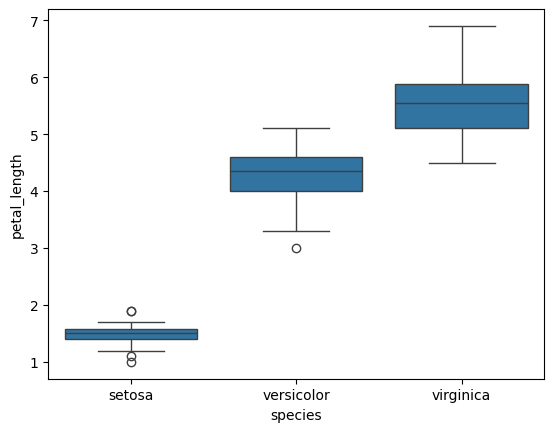

In [ ]:
#3. 시각화
sns.boxplot(data=iris, x='species', y='petal_length')
plt.show()

In [ ]:
#4. 정규성 검정
from scipy import stats

for name, g in iris.groupby('species'):
    result = stats.shapiro(g['petal_length'])
    print(f"Species : {name} , Statistics : {result.statistic} , p-value : {result.pvalue}")

Species : setosa , Statistics : 0.9549767850318984 , p-value : 0.05481146719553462
Species : versicolor , Statistics : 0.9660044025433202 , p-value : 0.15847783815657984
Species : virginica , Statistics : 0.9621864428612805 , p-value : 0.10977536903223795


In [46]:
#5. 등분산성 검정
from scipy.stats import levene
seto = iris.loc[iris['species'] == 'setosa', 'petal_length']
vers = iris.loc[iris['species'] == 'versicolor', 'petal_length']
virg = iris.loc[iris['species'] == 'virginica', 'petal_length']

stat, p = levene(seto, vers, virg)
print(f"Statistics: {stat}, p-value: {p}")

Statistics: 19.480338801923573, p-value: 3.1287566394085344e-08


In [50]:
#7. One-way ANOVA
f_stat, p_val = stats.f_oneway(seto, vers, virg)

print(f"F-statistic: {f_stat}")
print(f"p-value: {p_val}")

F-statistic: 1180.161182252981
p-value: 2.8567766109615584e-91


In [51]:
#8. 사후검정 (Turkey HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

post = pairwise_tukeyhsd(iris['petal_length'], iris['species'], alpha=0.05)
print(post)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


In [56]:
#10. 회귀 분석
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = iris[['sepal_length', 'sepal_width', 'petal_width']]
y = iris['petal_length']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)
print("Intercept:", lr.intercept_)
coef_df = pd.DataFrame({"feature": X.columns, "coef": lr.coef_}).sort_values("coef", ascending=False)
print("\nCoefficients:")
print(coef_df.to_string(index=False))

MSE: 0.12354507045731629
R^2: 0.9585127726373215
Intercept: 0.03688942292122954

Coefficients:
     feature      coef
 petal_width  1.472890
sepal_length  0.697919
 sepal_width -0.691295
